In [1]:
!pip install webcolors
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os, shutil
import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
import cv2
import numpy as np
import matplotlib.pyplot as plt
import colorama
from colorama import Fore, Style

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
TEST_DIR = '/content/drive/MyDrive/Data extraction from piechart/MINI-Project/test'
MODEL_DIR = '/content/drive/MyDrive/Data extraction from piechart/MINI-Project/VGG-19'
OUTPUT_DIR = '/content/drive/MyDrive/Data extraction from piechart/MINI-Project/barplots'

In [ ]:
testdf = pd.read_csv(MODEL_DIR + '/test.csv')

test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = testdf,
    directory = TEST_DIR,
    x_col = "chart",
    y_col = None,
    batch_size = 1,
    seed = 42,
    shuffle = False,
    class_mode = None,
    target_size = (224, 224))

Found 5 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 19 invalid image filename(s) in x_col="chart". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
json_file = open(MODEL_DIR + '/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(MODEL_DIR + '/model.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
test_generator.reset()
STEP_SIZE_TEST=test_generator.n // test_generator.batch_size

pred = loaded_model.predict(test_generator,
                            steps=STEP_SIZE_TEST,
                            verbose=1)

predicted_class_indices = np.argmax(pred, axis=1)

5/5 [==============================] - 4s 610ms/step


In [ ]:
class_indices = {'AreaGraph': 0,
 'BarGraph': 1,
 'BoxPlot': 2,
 'BubbleChart': 3,
 'FlowChart': 4,
 'LineGraph': 5,
 'Map': 6,
 'NetworkDiagram': 7,
 'ParetoChart': 8,
 'PieChart': 9,
 'ScatterGraph': 10,
 'TreeDiagram': 11,
 'VennDiagram': 12}

labels = class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
results = pd.DataFrame({"chart": filenames, "type": predictions})

In [ ]:
barplots = results.loc[results['type'] == 'BarGraph']
barplotlist = barplots['chart'].tolist()

In [ ]:
barplot = results.loc[results['type'] == 'PieChart']
piechartlist = barplot['chart'].tolist()

In [ ]:
if not os.path.exists(OUTPUT_DIR):
    os.mkdir(OUTPUT_DIR)
    
for file in os.listdir(TEST_DIR):
    if file in barplotlist:
        shutil.copy(os.path.join(TEST_DIR, file), OUTPUT_DIR)

In [ ]:
dir2='piechart'

In [ ]:
if not os.path.exists(dir2):
    os.mkdir(dir2)
    
for file in os.listdir(TEST_DIR):
    if file in piechartlist:
        shutil.copy(os.path.join(TEST_DIR, file), dir2)

extraction


In [5]:
import webcolors
import time
start = time.time()
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name



In [6]:
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

In [7]:
import math 
def dis(x1,y1,x2,y2):
  return math.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))

In [8]:

def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    # num_labels, labels = cv2.connectedComponents(img)

    connectivity = 8
    output = cv2.connectedComponentsWithStats(img, connectivity, cv2.CV_32S)
    # The first cell is the number of labels
    num_labels = output[0]
    print(num_labels)
    # The second cell is the label matrix
    labels = output[1]
    # print(labels)
    # The third cell is the stat matrix
    stats = output[2]
    centroids =output[3]
    #######
    xc=122
    yc=117
    #xc=int(centroids[0][0])
    #yc=int(centroids[0][1])-30
    sumn=0
    count=0
    mean=np. mean(centroids)
    print(centroids)
    print(mean)
    x=np.array(output[2][1:,cv2.CC_STAT_AREA])
    print(x)
    wx=np.array(output[2][1:,cv2.CC_STAT_WIDTH])
    hx=np.array(output[2][1:,cv2.CC_STAT_HEIGHT])
    tx=np.array(output[2][1:,cv2.CC_STAT_TOP])
    lx=np.array(output[2][1:,cv2.CC_STAT_LEFT])
    print("h w ",hx,"\n",wx)
    print("t l ",tx,"\n",lx)
    sum=0
    sumx=0
    sumy=0
    src2=cv2.cvtColor(src, cv2.COLOR_RGB2BGR)
    for idx,value in enumerate(x):
      if idx==0 or value<100:
        continue
      #########
      h=hx[idx]
      w=wx[idx]
      if w/3>h:
        continue
      xi=int(centroids[idx+1][0])
      yi=int(centroids[idx+1][1])
      ######
      dist=dis(xc,yc,xi,yi)
      sumn=sumn+dist
      count=count+1
    meann=sumn/count
    print("count",count)  
    # print("mean",meann)  
    cnt=0
    for idx,value in enumerate(x):
      if idx==0 or value<100:
        continue
      h=hx[idx]
      w=wx[idx]
      if w/3>h:
        continue
      xi=int(centroids[idx+1][0])
      yi=int(centroids[idx+1][1])
      print(xi," ",yi)
      sumx=sumx+xi
      sumy=sumy+yi
      d=dis(xi,yi,xc,yc)
      if d<meann+meann/4:
        cnt=cnt+1
      else :
        print("3d")
        continue
      sum=sum+value
    cnt=0
    for idx,value in enumerate(x):
      if idx==0 or value<100:
        continue
      #########
      h=hx[idx]
      w=wx[idx]
      if w/3>h:
        continue
      # print(value)
      xi=int(centroids[idx+1][0])
      yi=int(centroids[idx+1][1])
      print(xi," ",yi)
      sumx=sumx+xi
      sumy=sumy+yi
      d=dis(xi,yi,xc,yc)
      if d<meann+meann/4:
        cnt=cnt+1
      else :
        print("ignored ",xi,yi)
        continue
      b = src2[yi,xi, 0]
      g = src2[yi,xi, 1]
      r = src2[yi,xi, 2]
      # rgb_pixel_value = src.getpixel((xi,yi))
      # print(src2[yi,xi,0])
      # print(src2[yi,xi,1])
      # print(src2[yi,xi,2])
      # print(xi,yi)
      requested_colour=[b,g,r]
      actual_name, closest_name = get_colour_name(requested_colour)
      colored_text=colored(b,g,r,closest_name);
      print(colored_text,end=" ")
      print(Style.RESET_ALL,end="")
      print(" Percentage : ",value/sum*100)     
    print("cnt ",cnt)
    print("cent ",sumx/8," ",sumy/8)
    # print(sum)
    # print((output[2][1:,cv2.CC_STAT_AREA]))
    # print(stats[labels, cv2.CC_STAT_AREA])
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()


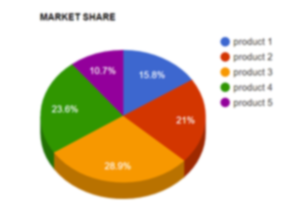

In [9]:
import cv2
import numpy
from google.colab.patches import cv2_imshow
# read image
import glob
cv_img = []
# for img in glob.glob("/content/piechart/*.png"):
src = cv2.imread('/content/drive/MyDrive/Data extraction from piechart/MINI-Project/piechart/p.png', cv2.IMREAD_UNCHANGED)
src = cv2.GaussianBlur(src, (5, 5), 0)
    # display input and output image
cv2_imshow(src)
# for img in glob.glob("/content/piechart/*.png"):
#     #src= cv2.imread(img)
#     src = cv2.imread(img, cv2.IMREAD_UNCHANGED)
#     src = cv2.GaussianBlur(src, (5, 5), 0)
#     # display input and output image
#     cv2_imshow(src)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

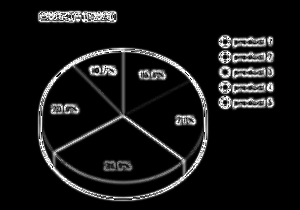

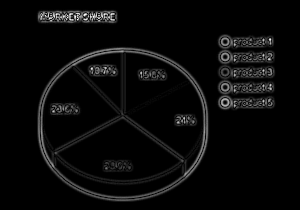

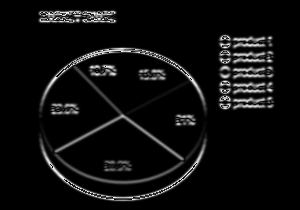

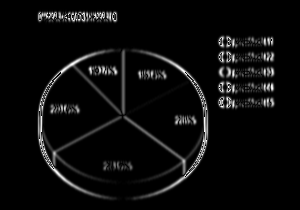

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread("chart3.png", cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 0, 1)
sobelY = cv2.Sobel(img, cv2.CV_64F, 1, 0)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]
cv2.imwrite("output.png",sobelCombined)
cv2_imshow(sobelCombined)
cv2_imshow(lap)
cv2_imshow(sobelX)
cv2_imshow(sobelY)
plt.show()

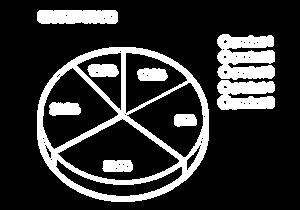

True

In [11]:
_, thresh = cv2.threshold(sobelCombined,10,255,cv2.THRESH_BINARY) #+cv2.THRESH_OTSU
# ?_, thresh = cv2.threshold(sobelCombined,10,255,cv2.THRESH_TOZERO) #+cv2.THRESH_OTSU
cv2_imshow(thresh)
cv2.imwrite("threshed.png",thresh)


In [12]:
def undesired_objects (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255
    cv2_imshow(img2)
    cv2.waitKey()
    return img2

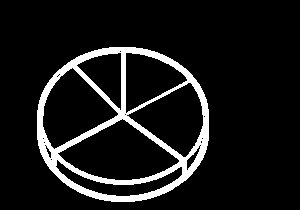

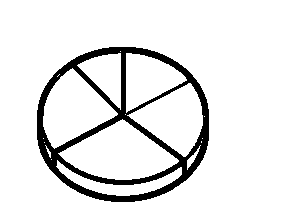

In [13]:
from skimage.morphology import skeletonize

new=undesired_objects(thresh)
cv2.imwrite("new.png",new)
ret, thresh2 = cv2.threshold(new, 150, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2)
cv2.imwrite("output1.png",thresh2)
src_ = cv2.imread('new.png', cv2.IMREAD_UNCHANGED)

19
[[122.06201293 127.85591113]
 [163.57958967  94.36263019]
 [120.          51.        ]
 [105.27868852  74.55067064]
 [147.91157407  78.86296296]
 [ 73.03800825 109.09929287]
 [ 58.          75.        ]
 [173.58432148 118.51152833]
 [125.         114.        ]
 [204.         116.        ]
 [118.82647543 153.80225723]
 [ 43.         138.        ]
 [202.         138.        ]
 [201.         141.5       ]
 [ 44.         142.        ]
 [ 48.2        151.48      ]
 [191.97802198 158.15384615]
 [ 51.         159.        ]
 [119.35843137 183.09019608]]
122.0022741917102
[41381     1  1342  2160  3394     3  3036     1     1  4253     1     1
     2     1    25    91     1  1275]
h w  [210   1  57  60  81   3  74   1   1  61   1   1   2   1  13  25   1  36] 
 [300   1  44  61  75   3  76   1   1 121   1   1   1   1   6  14   1 126]
t l  [  0  51  53  53  68  74  83 114 116 119 138 138 141 142 145 145 159 160] 
 [  0 120  77 126  43  57 127 125 204  58  43 202 201  44  45 187  51  56]
count 

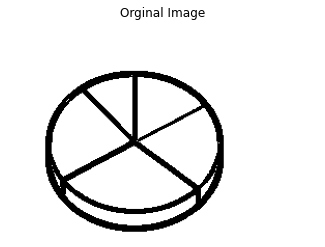

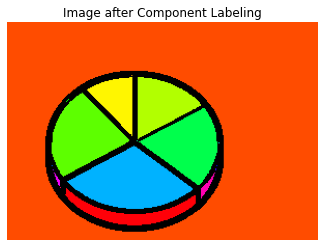

In [14]:
connected_component_label("/content/output1.png")